In [1]:
import os
import fy3
import numpy as np
import configparser
import matplotlib.pyplot as plt

In [2]:
config = configparser.ConfigParser()
config.read('file_paths.ini')
config.sections()

['MAIN_DATA_PATH', 'FY3', 'HIMAWARI']

In [3]:
# File paths for FengYun-3E data.
FY3E_DATA_FOLDERS_LOCATION = config['FY3']['FY3E_MAIN_DATA_LOCATION']
FY3E_RAW_DATA_LOCATION = config['FY3']['FY3E_RAW_DATA_LOCATION']
FY3E_L0_DATA_LOCATION = config['FY3']['FY3E_L0_DATA_LOCATION']
FY3E_L1_DATA_LOCATION = config['FY3']['FY3E_L1_DATA_LOCATION']
FY3E_L1_GOE_DATA_LOCATION = config['FY3']['FY3E_L1_GOE_DATA_LOCATION']
FY3E_L1_IMAGE_DATA_LOCATION = config['FY3']['FY3E_L1_IMAGE_DATA_LOCATION']
FY3E_L1_GEOREF_IMAGE_DATA_LOCATION = config['FY3']['FY3E_L1_GEOREF_IMAGE_DATA_LOCATION']

In [4]:
fy3e_L0_files_paths = [FY3E_L0_DATA_LOCATION + file_name for file_name in os.listdir(FY3E_L0_DATA_LOCATION)]
fy3e_l1_geo_files_paths = [FY3E_L1_GOE_DATA_LOCATION + file_name for file_name in os.listdir(FY3E_L1_GOE_DATA_LOCATION)]
fy3e_l1_image_files_paths = [FY3E_L1_IMAGE_DATA_LOCATION + file_name for file_name in os.listdir(FY3E_L1_IMAGE_DATA_LOCATION)]

print('L0 files -', fy3e_L0_files_paths)
print()
print('GEO files -', fy3e_l1_geo_files_paths)
print()
print('Image files -', fy3e_l1_image_files_paths)

L0 files - ['E:/Satellite data/FY-3E/L0/Y3E_08534_230226070855_7860R_MERSI.DAT']

GEO files - ['E:/Satellite data/FY-3E/L1/geo/FY3E_MERSI_GRAN_L1_20230228_2215_GEOQK_V0.HDF']

Image files - ['E:/Satellite data/FY-3E/L1/image/FY3E_MERSI_GRAN_L1_20230228_2215_0250M_V0.HDF', 'E:/Satellite data/FY-3E/L1/image/FY3E_MERSI_GRAN_L1_20240301_0915_0250M_V0.HDF']


In [5]:
data = fy3.FY3EIrDnImg(fy3e_l1_image_files_paths[0])

TypeError: Image data of dtype object cannot be converted to float

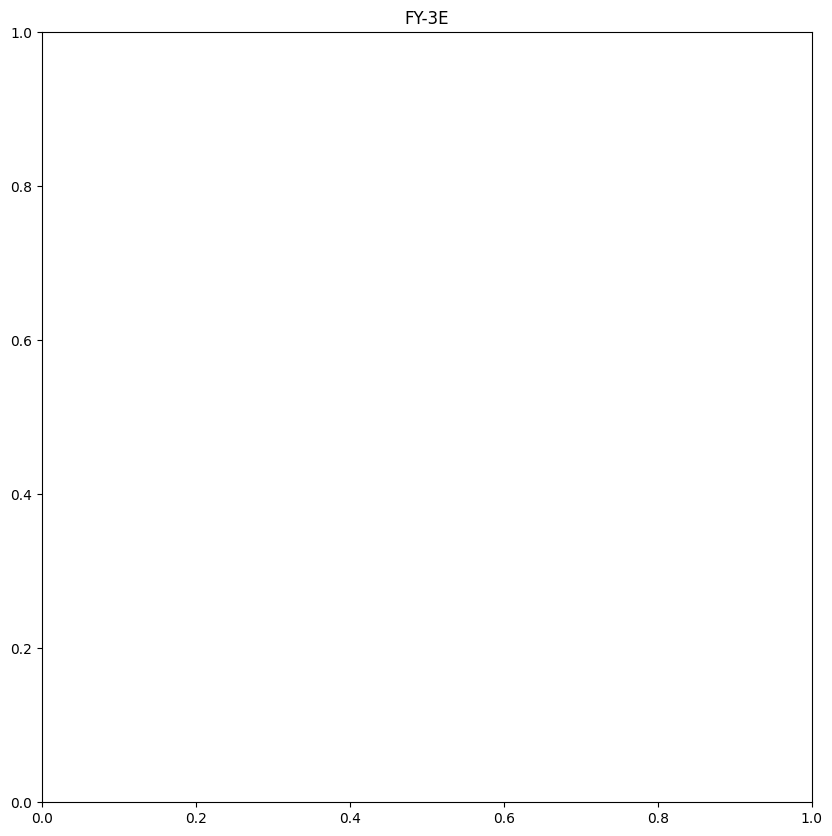

In [6]:
data.dn_data_b6.imshow(title=data.satellite_name)

In [6]:
sec_data = data.dn_data_b6.get_sections()

In [7]:
x, y = 4152, 1271

In [8]:
sec = sec_data.get_sector_by_index(x, y)

0

In [29]:
sec.sectors_index

(31, 14)

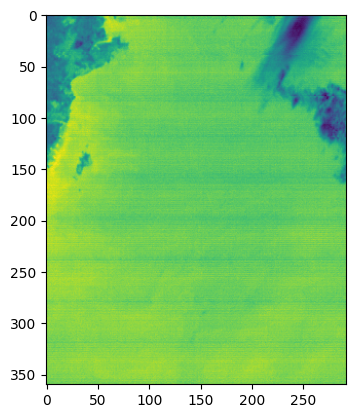

In [30]:
plt.imshow(np.concatenate([sec_data[26, 14],
                           sec_data[27, 14],
                           sec_data[28, 14],
                           sec_data[29, 14], 
                           sec_data[30, 14], 
                           sec_data[31, 14], 
                           sec_data[32, 14],
                           sec_data[33, 14],
                           sec_data[34, 14]]))

In [21]:
test = np.concatenate([sec_data[32, 14],
                           sec_data[33, 14],
                           sec_data[34, 14]])

In [13]:
test = sec_data[34, 14]

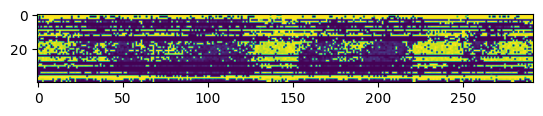

In [20]:
plt.imshow(test)

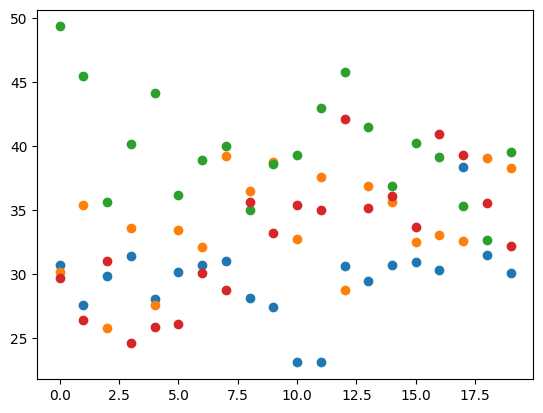

In [16]:
plt.scatter(np.arange(20), np.std(sec_data[31, 14][10:30, 100:200], axis=1))
plt.scatter(np.arange(20), np.std(sec_data[32, 14][10:30, 100:200], axis=1))
plt.scatter(np.arange(20), np.std(sec_data[33, 14][10:30, 100:200], axis=1))
plt.scatter(np.arange(20), np.std(sec_data[34, 14][10:30, 100:200], axis=1))

In [67]:
np.max(np.std(target, axis=1)), np.min(np.std(target, axis=1))

(42.8153161389251, 26.392239337827334)

In [21]:
np.std(sec_data[31, 14][0, 120:180]), np.std(sec_data[32, 14][0, 120:180])

(21.94072823667336, 30.49726308303018)

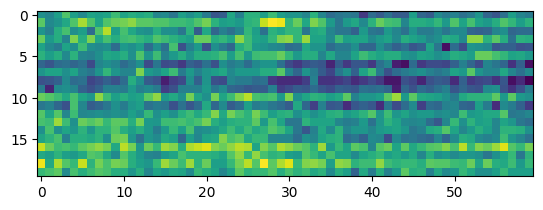

In [36]:
plt.imshow(target[30:50, 120:180])

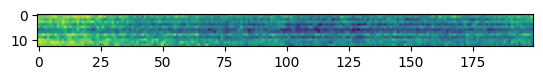

In [52]:
plt.imshow(target[32:45, 50:250])

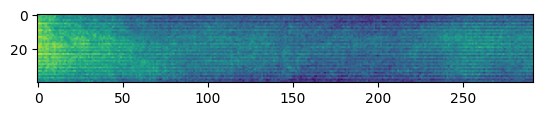

In [22]:
plt.imshow(sec_data[31, 14])

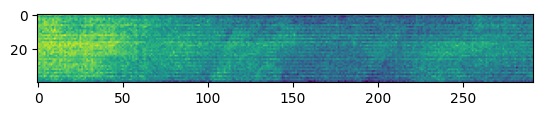

In [23]:
plt.imshow(sec_data[32, 14])

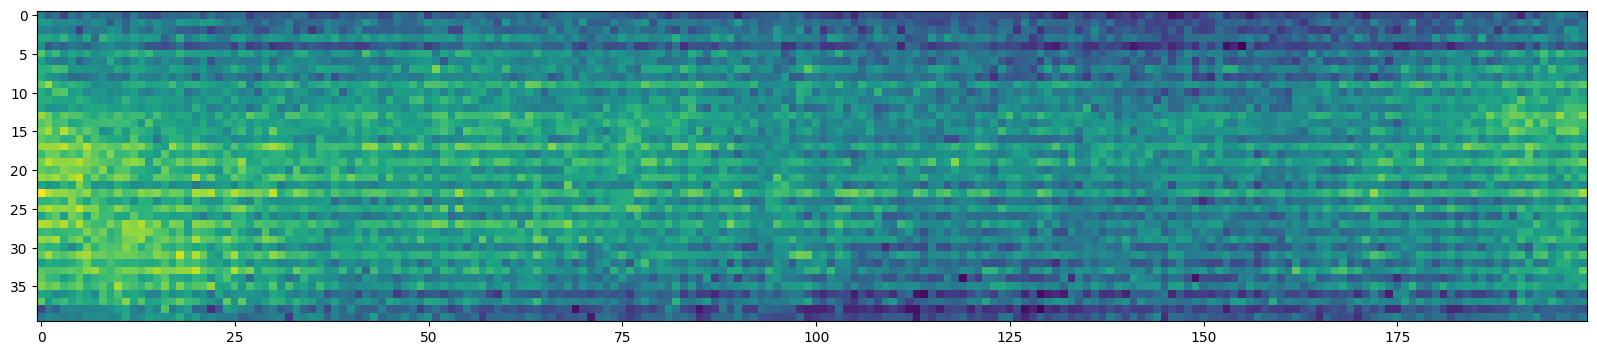

In [12]:
fig, ax = plt.subplots(figsize=(20, 20))
        
#ax.title.set_text(title)
ax.imshow(sec[:, 50:250])